# CPSC 4820 Project - Fire Intensity Prediction using Machine Learning

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Descriptive Analysis

In [2]:
hotspots = pd.read_csv("data/combined_hotspots.csv")

In [4]:
hotspots.head()

,lat,lon,rep_date,source,sensor,satellite,agency,temp,rh,ws,...,greenup,elev,sfl,cfl,tfc0,ecozone,sfc0,cbh,uid,fid
0,53.0170,-124.689,2019/03/27 21:15:00.000,NASA,MODIS,Aqua,BC,3.761,59,11.673,...,0,1178,NaN,0.8,NaN,NaN,NaN,NaN,NaN,NaN
1,50.5910,-119.904,2019/11/17 20:29:00.000,USFS,IBAND,JPSS1,BC,7.732,84,10.635,...,0,761,NaN,2.1,0.140000,14.0,0.140000,NaN,NaN,NaN
2,53.1846,-124.001,2019/03/27 19:42:00.000,NASA,IBAND,S-NPP,BC,2.090,64,11.087,...,0,1291,NaN,2.7,0.095046,NaN,0.095046,NaN,NaN,NaN
3,54.0710,-123.757,2019/11/17 21:18:00.000,USFS,IBAND,N,BC,8.218,61,14.859,...,0,1266,NaN,0.6,0.040000,14.0,0.040000,NaN,NaN,NaN
4,52.0966,-122.069,2019/03/29 11:00:00.000,NASA,IBAND,S-NPP,BC,11.225,31,7.106,...,0,734,NaN,2.2,0.316152,NaN,0.316152,NaN,NaN,NaN


In [5]:
hotspots.shape

(1033890, 37)

In [6]:
hotspots.columns

Index(['lat', 'lon', 'rep_date', 'source', 'sensor', 'satellite', 'agency',
       'temp', 'rh', 'ws', 'wd', 'pcp', 'ffmc', 'dmc', 'dc', 'isi', 'bui',
       'fwi', 'fuel', 'ros', 'sfc', 'tfc', 'bfc', 'hfi', 'cfb', 'estarea',
       'pcuring', 'greenup', 'elev', 'sfl', 'cfl', 'tfc0', 'ecozone', 'sfc0',
       'cbh', 'uid', 'fid'],
      dtype='object')

In [7]:
hotspots.dtypes

lat          float64
lon          float64
rep_date      object
source        object
sensor        object
satellite     object
agency        object
temp         float64
rh             int64
ws           float64
wd             int64
pcp          float64
ffmc         float64
dmc          float64
dc           float64
isi          float64
bui          float64
fwi          float64
fuel          object
ros          float64
sfc          float64
tfc          float64
bfc          float64
hfi          float64
cfb          float64
estarea      float64
pcuring      float64
greenup       object
elev           int64
sfl          float64
cfl          float64
tfc0         float64
ecozone      float64
sfc0         float64
cbh          float64
uid          float64
fid          float64
dtype: object

In [8]:
# Assessing features with missing values
null_values = hotspots.isnull().sum()
print("Columns with null values:\n", null_values[null_values > 0])

Columns with null values:
 source        696595
satellite      50110
ros              150
sfc              150
tfc              150
bfc           749015
hfi              150
cfb              150
estarea      1019088
pcuring       694831
greenup       694831
sfl             3541
tfc0             170
ecozone          237
sfc0             258
cbh           700136
uid          1021169
fid           337295
dtype: int64


In [9]:
# Calculate the percentage of missing values in each column
missing_percentage = hotspots.isnull().mean() * 100

# Convert the Series to a DataFrame for better readability
missing_percentage_df = missing_percentage.reset_index()
missing_percentage_df.columns = ['Column', 'Missing Percentage']
missing_percentage_df

,Column,Missing Percentage
0,lat,0.000000
1,lon,0.000000
2,rep_date,0.000000
3,source,67.376123
4,sensor,0.000000
5,satellite,4.846744
6,agency,0.000000
7,temp,0.000000
8,rh,0.000000
9,ws,0.000000


In [10]:
#Fill up the missing satelite information with 'Unknown'
hotspots['satellite'].fillna('unknown', inplace=True)

In [11]:
# Identify rows with missing values in the 'sfc' column
sfc_missing_indices = hotspots[hotspots['sfc'].isnull()].index

In [12]:
# Compare with other columns
columns_to_check = ['tfc', 'hfi', 'cfb', 'tfc0', 'sfc0']
missing_in_all = hotspots.loc[sfc_missing_indices, columns_to_check].isnull().all(axis=1)

# Check if all values are True (indicating the same rows are missing in all columns)
if missing_in_all.all():
    print("The rows with missing values in 'sfc' are the same as those in 'tfc', 'hfi', 'cfb', 'tfc0', and 'sfc0'.")
else:
    print("The rows with missing values in 'sfc' are NOT the same as those in 'tfc', 'hfi', 'cfb', 'tfc0', and 'sfc0'.")

# Display the indices where the missing values do not match
mismatched_indices = missing_in_all[~missing_in_all].index
print("Indices with mismatched missing values:\n", mismatched_indices)

The rows with missing values in 'sfc' are the same as those in 'tfc', 'hfi', 'cfb', 'tfc0', and 'sfc0'.
Indices with mismatched missing values:
 Int64Index([], dtype='int64')


In [13]:
#hotspots = hotspots.drop(sfc_missing_indices)
hotspots = hotspots.drop(columns=['cbh', 'bfc','pcuring', 'greenup','source','estarea','fid','uid'])
hotspots = hotspots.dropna(subset=['sfl','tfc0','ecozone','sfc0'])

In [14]:
# Check for duplicate rows
num_duplicates = hotspots.duplicated().sum()
hotspots = hotspots.drop_duplicates()

In [15]:
hotspots = hotspots[hotspots['hfi'] != 0]

In [16]:
hotspots = hotspots.drop(columns=['tfc0', 'sfc0'])
hotspots = hotspots.drop(columns=['agency'])

In [17]:
hotspots['rep_date'] = pd.to_datetime(hotspots['rep_date'], errors='coerce')

In [18]:
hotspots['year'] = hotspots['rep_date'].dt.year
hotspots['month'] = hotspots['rep_date'].dt.month
hotspots['day'] = hotspots['rep_date'].dt.dayofyear

In [20]:
##hotspots.to_csv('/Users/guneetsharma/Desktop/CPSC PROJECT FIRE/cleaned_hotspots', index=False)

### Sampling

In [ ]:
conda activate streamlit_env


python(67744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


usage: conda [-h] [-v] [--no-plugins] [-V] COMMAND ...
conda: error: argument COMMAND: invalid choice: 'activate' (choose from 'clean', 'compare', 'config', 'create', 'info', 'init', 'install', 'list', 'notices', 'package', 'remove', 'uninstall', 'rename', 'run', 'search', 'update', 'upgrade', 'build', 'convert', 'debug', 'develop', 'doctor', 'index', 'inspect', 'metapackage', 'render', 'skeleton', 'repo', 'pack', 'content-trust', 'server', 'verify', 'env', 'token')

Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
print(hotspots['year'].value_counts())

2023    680106
2021    229679
2022     47713
2019     14094
2020      8234
Name: year, dtype: int64


In [23]:
years_of_interest = [2019, 2020, 2021, 2022, 2023]
hotspots = hotspots[hotspots['year'].isin(years_of_interest)]

# Perform stratified sampling to get a representative sample
sampled_df, _ = train_test_split(hotspots, test_size=0.25, stratify=hotspots['year'], random_state=1)

# Display the shape of the sampled DataFrame to verify
print(f"Sampled data shape: {sampled_df.shape}")

# Ensure each year is represented in the sampled data
print("Sampled data year distribution:")
print(sampled_df['year'].value_counts())

Sampled data shape: (734869, 29)
Sampled data year distribution:
2023    510079
2021    172259
2022     35785
2019     10570
2020      6176
Name: year, dtype: int64


In [24]:
def categorize_intensity(hfi):
    if hfi <= 10:
        return 'Low'
    elif hfi <= 100:
        return 'Moderate'
    else:
        return 'High'

# Apply the function to create the new 'Intensity' feature
sampled_df['Intensity'] = sampled_df['hfi'].apply(categorize_intensity)

# Display the first few rows to verify
sampled_df[['hfi', 'Intensity']].head()

,hfi,Intensity
86081,6080.0,High
477065,4420.0,High
657036,2728.0,High
548634,46.0,Moderate
553508,1486.0,High


In [25]:
sampled_df = sampled_df[sampled_df['hfi'] <= 60000]

# Verify the filtering step
print(f"Number of rows after filtering 'hfi' > 60000: {sampled_df.shape[0]}")

Number of rows after filtering 'hfi' > 60000: 733476


### EDA

In [26]:
# Extract the year from 'rep_date'
hotspots['year'] = hotspots['rep_date'].dt.year

# Filter years of interest
years_of_interest = [2019, 2020, 2021, 2022, 2023]
hotspots = hotspots[hotspots['year'].isin(years_of_interest)]

# Perform stratified sampling to get a representative sample
sampled_df, _ = train_test_split(hotspots, test_size=0.25, stratify=hotspots['year'], random_state=1)

# Display the shape of the sampled DataFrame to verify
print(f"Sampled data shape: {sampled_df.shape}")

# Ensure each year is represented in the sampled data
print("Sampled data year distribution:")
print(sampled_df['year'].value_counts())

# Function to categorize intensity
def categorize_intensity(hfi):
    if hfi <= 10:
        return 'Low'
    elif hfi <= 100:
        return 'Moderate'
    else:
        return 'High'

# Apply the function to create the new 'Intensity' feature
sampled_df['Intensity'] = sampled_df['hfi'].apply(categorize_intensity)

# Display the first few rows to verify
print(sampled_df[['hfi', 'Intensity']].head())

# Filter 'hfi' <= 60000
sampled_df = sampled_df[sampled_df['hfi'] <= 60000]

# Verify the filtering step
print(f"Number of rows after filtering 'hfi' > 60000: {sampled_df.shape[0]}")

# Correct columns to drop
columns_to_drop = ['lat', 'lon', 'rep_date', 'source', 'sensor', 'satellite', 'agency', 'temp', 'rh', 'ws', 'greenup', 'elev', 'sfl', 'cfl', 'tfc0', 'ecozone', 'sfc0', 'cbh', 'uid', 'fid', 'year']
hotspots_numeric = sampled_df.drop(columns=columns_to_drop)

# Plotting histograms for numeric columns
hotspots_numeric.hist(figsize=(15, 10), bins=20, edgecolor='k', alpha=0.7)
plt.tight_layout()
plt.show()


Sampled data shape: (734869, 29)
Sampled data year distribution:
2023    510079
2021    172259
2022     35785
2019     10570
2020      6176
Name: year, dtype: int64
           hfi Intensity
86081   6080.0      High
477065  4420.0      High
657036  2728.0      High
548634    46.0  Moderate
553508  1486.0      High
Number of rows after filtering 'hfi' > 60000: 733476


KeyError: "['source', 'agency', 'greenup', 'tfc0', 'sfc0', 'cbh', 'uid', 'fid'] not found in axis"

            hfi Intensity
280842     18.0  Moderate
244297  14141.0      High
320690    634.0      High
46792    8753.0      High
227537   4807.0      High
Number of rows after filtering 'hfi' > 60000: 252447


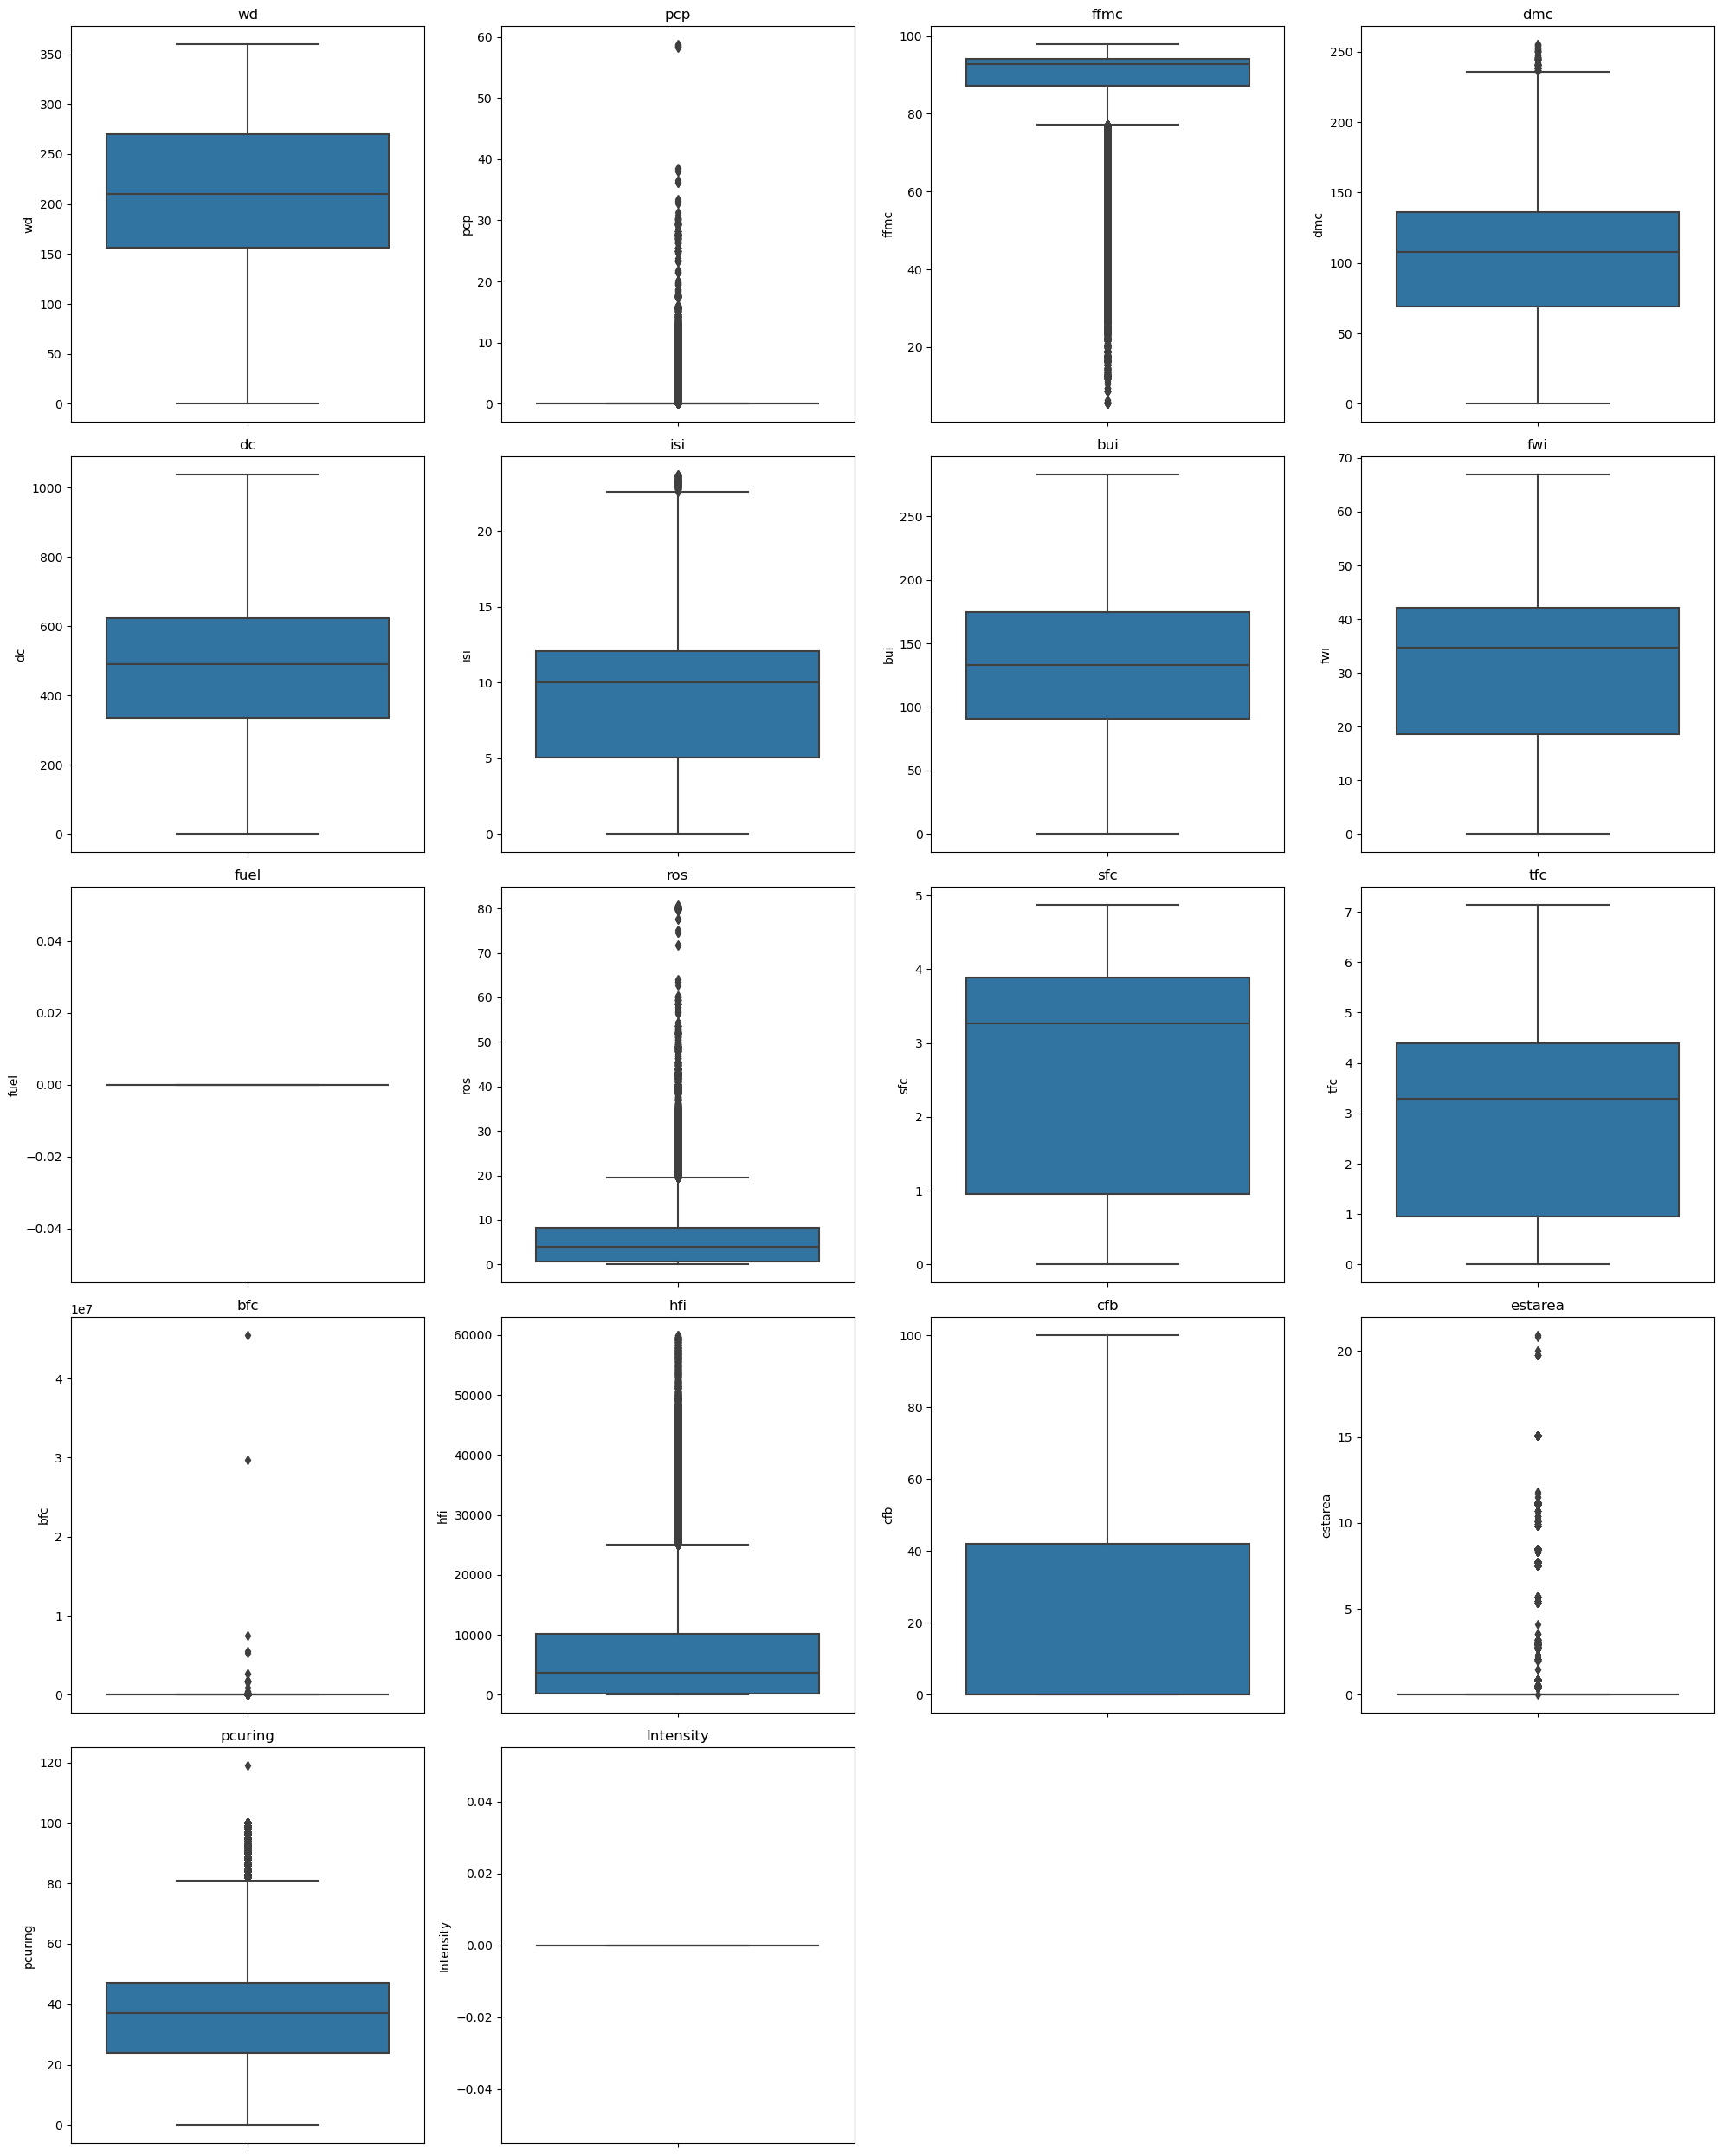

In [ ]:


# Function to categorize intensity
def categorize_intensity(hfi):
    if hfi <= 10:
        return 'Low'
    elif hfi <= 100:
        return 'Moderate'
    else:
        return 'High'

# Apply the function to create the new 'Intensity' feature
sampled_df['Intensity'] = sampled_df['hfi'].apply(categorize_intensity)

# Display the first few rows to verify
print(sampled_df[['hfi', 'Intensity']].head())

# Filter 'hfi' <= 60000
sampled_df = sampled_df[sampled_df['hfi'] <= 60000]

# Verify the filtering step
print(f"Number of rows after filtering 'hfi' > 60000: {sampled_df.shape[0]}")

# Correct columns to drop
columns_to_drop = ['lat', 'lon', 'rep_date', 'source', 'sensor', 'satellite', 'agency', 'temp', 'rh', 'ws', 'greenup', 'elev', 'sfl', 'cfl', 'tfc0', 'ecozone', 'sfc0', 'cbh', 'uid', 'fid', 'year']
hotspots_numeric = sampled_df.drop(columns=columns_to_drop)

# Ensure all columns are numeric and handle missing values
hotspots_numeric = hotspots_numeric.apply(pd.to_numeric, errors='coerce')
hotspots_numeric = hotspots_numeric.fillna(0)

# List of numerical columns
numerical_columns = hotspots_numeric.columns.tolist()

# Plot individual box plots side by side
num_cols = 4  # Number of plots per row
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate the number of rows needed

plt.figure(figsize=(20, num_rows * 5))  # Adjust the height to accommodate the number of rows

for idx, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, idx)
    sns.boxplot(y=hotspots_numeric[column])
    plt.title(column)

plt.tight_layout()
plt.show()


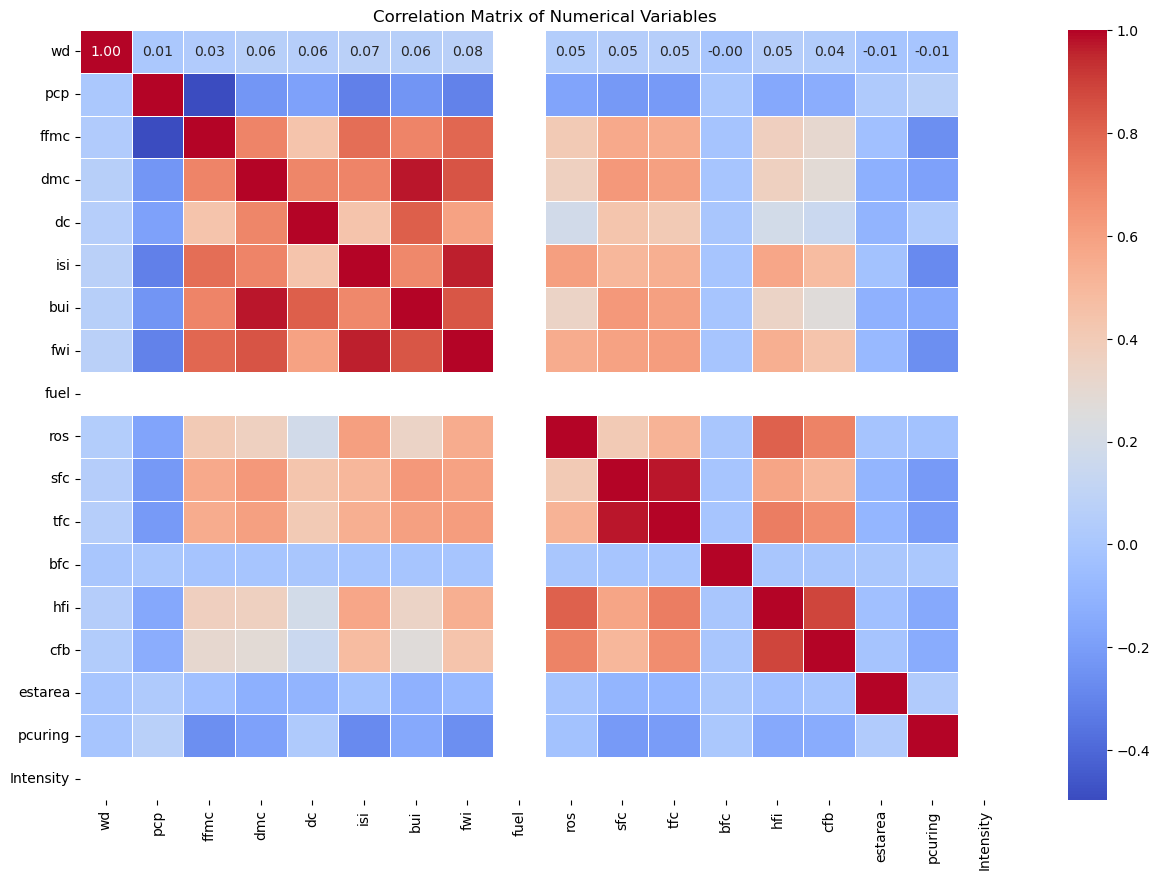

In [ ]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = hotspots_numeric.corr()
# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


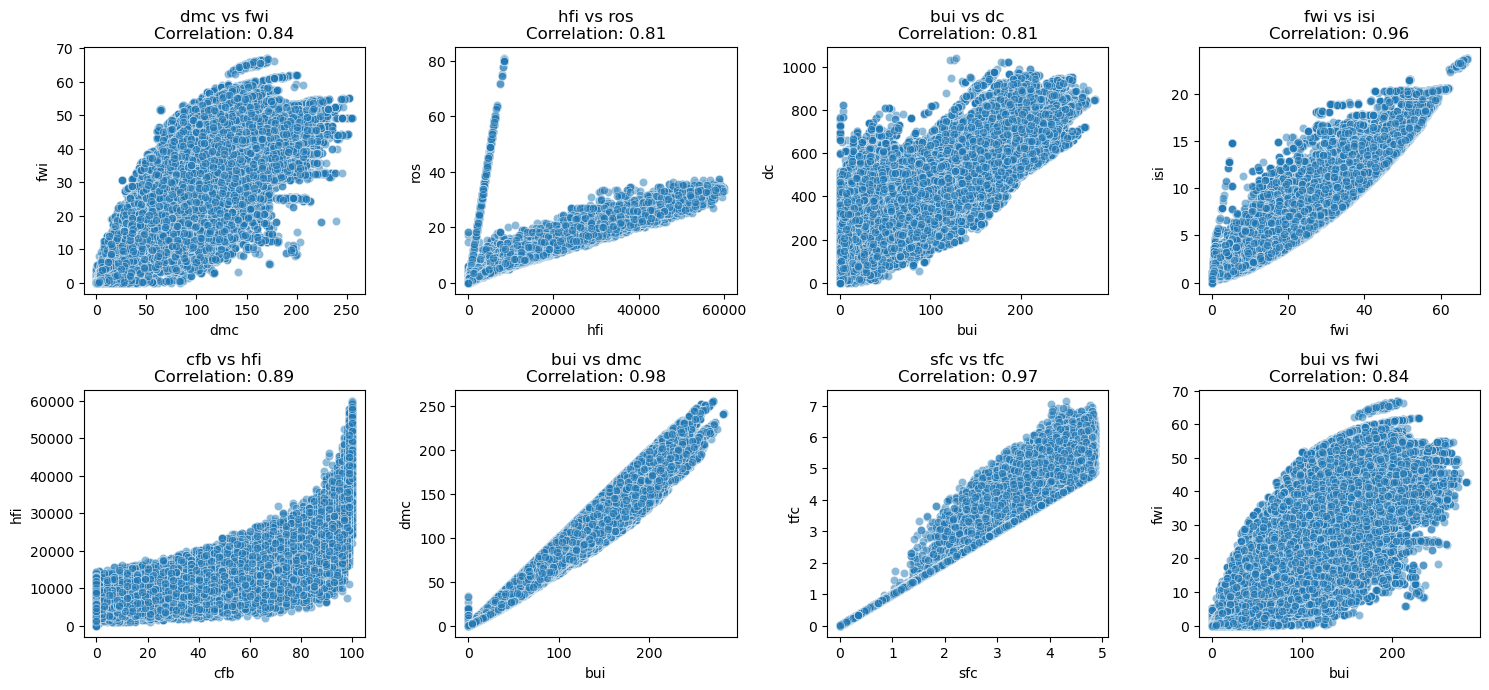

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure all columns are numeric and handle missing values
hotspots_numeric = hotspots_numeric.apply(pd.to_numeric, errors='coerce')
hotspots_numeric = hotspots_numeric.fillna(0)

# Compute the correlation matrix
correlation_matrix = hotspots_numeric.corr()

# Identify pairs of columns with high correlation
high_corr_pairs = [(i, j) for i in correlation_matrix.columns for j in correlation_matrix.columns if i != j and correlation_matrix.loc[i, j] > 0.8]

# Remove duplicates (i.e., (A, B) and (B, A))
high_corr_pairs = list(set(tuple(sorted(pair)) for pair in high_corr_pairs))

# Plot scatter plots for highly correlated pairs
plt.figure(figsize=(15, 10))
for idx, (i, j) in enumerate(high_corr_pairs[:12]):  # limiting to the first 12 pairs for better visualization
    plt.subplot(3, 4, idx + 1)  # 3 rows, 4 columns for up to 12 plots
    sns.scatterplot(x=hotspots_numeric[i], y=hotspots_numeric[j], alpha=0.5)
    plt.title(f"{i} vs {j}\nCorrelation: {correlation_matrix.loc[i, j]:.2f}")
plt.tight_layout()
plt.show()


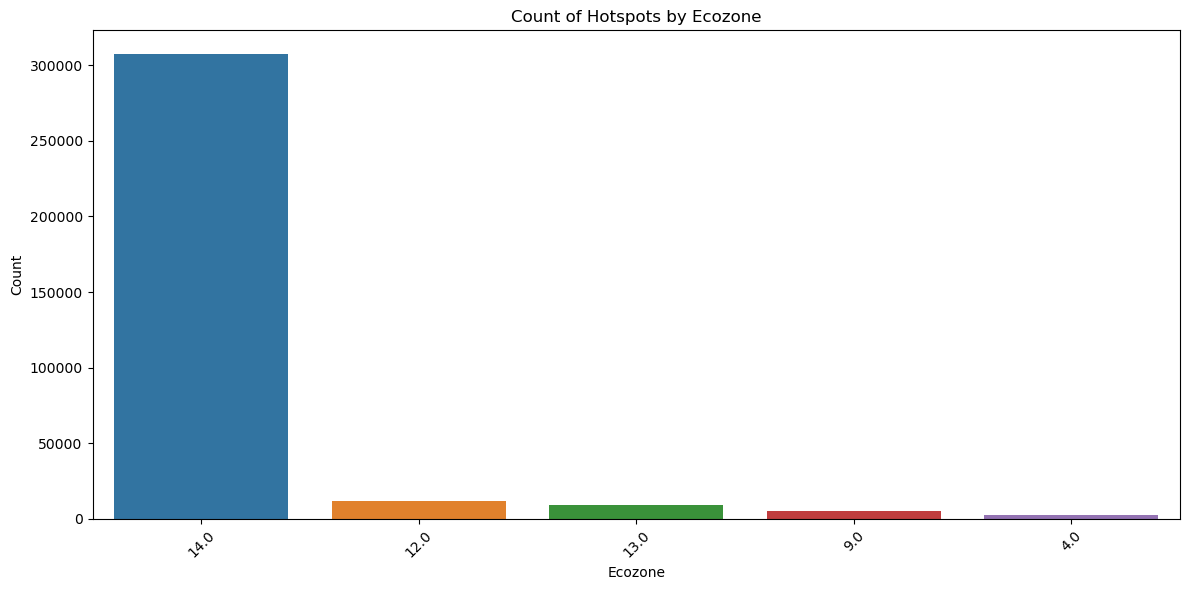

In [ ]:
# Ensure 'ecozone' is treated as a categorical variable
hotspots['ecozone'] = hotspots['ecozone'].astype('category')

# Create a bar chart for the 'ecozone' column
plt.figure(figsize=(12, 6))
sns.countplot(x='ecozone', data=hotspots, order=hotspots['ecozone'].value_counts().index)
plt.title('Count of Hotspots by Ecozone')
plt.xlabel('Ecozone')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

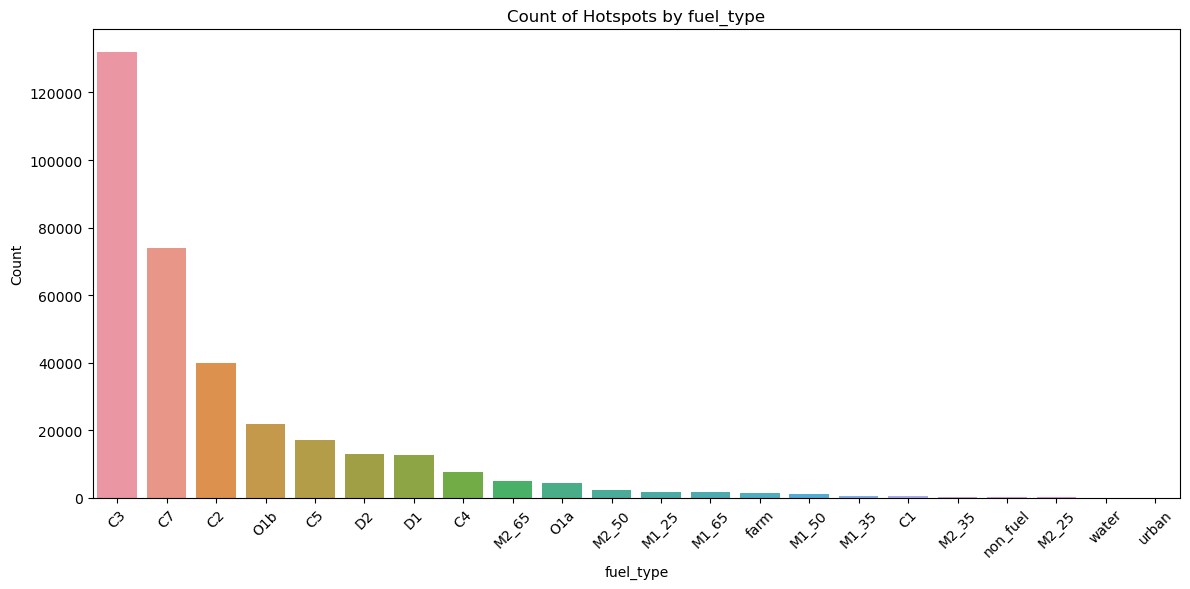

In [ ]:

hotspots['fuel'] = hotspots['fuel'].astype('category')

# Create a bar chart for the 'ecozone' column
plt.figure(figsize=(12, 6))
sns.countplot(x='fuel', data=hotspots, order=hotspots['fuel'].value_counts().index)
plt.title('Count of Hotspots by fuel_type')
plt.xlabel('fuel_type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



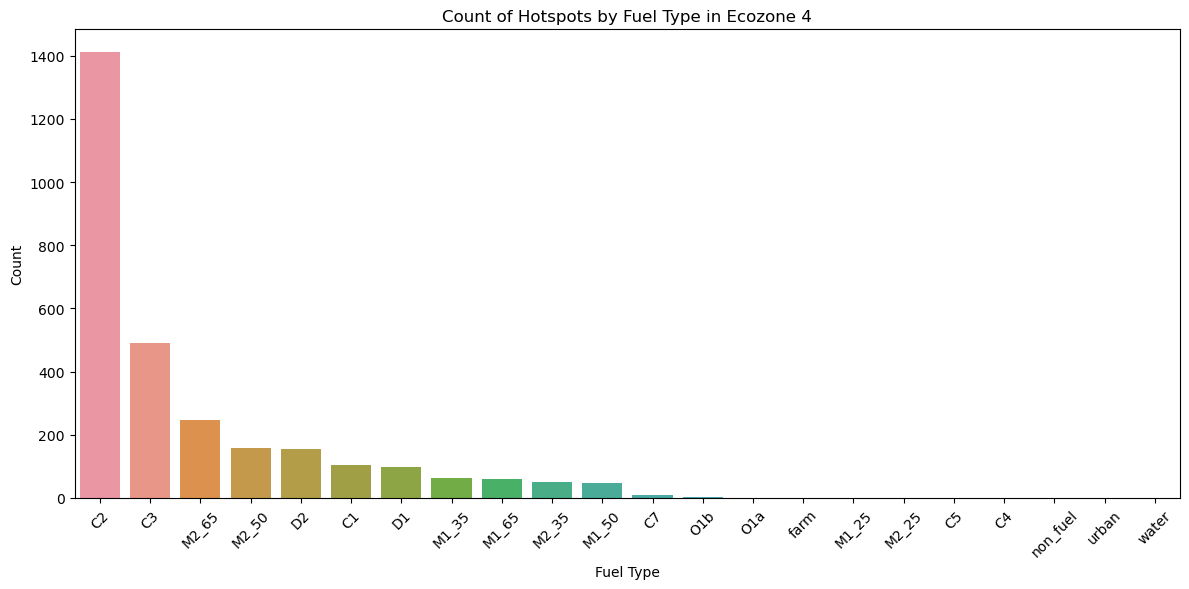

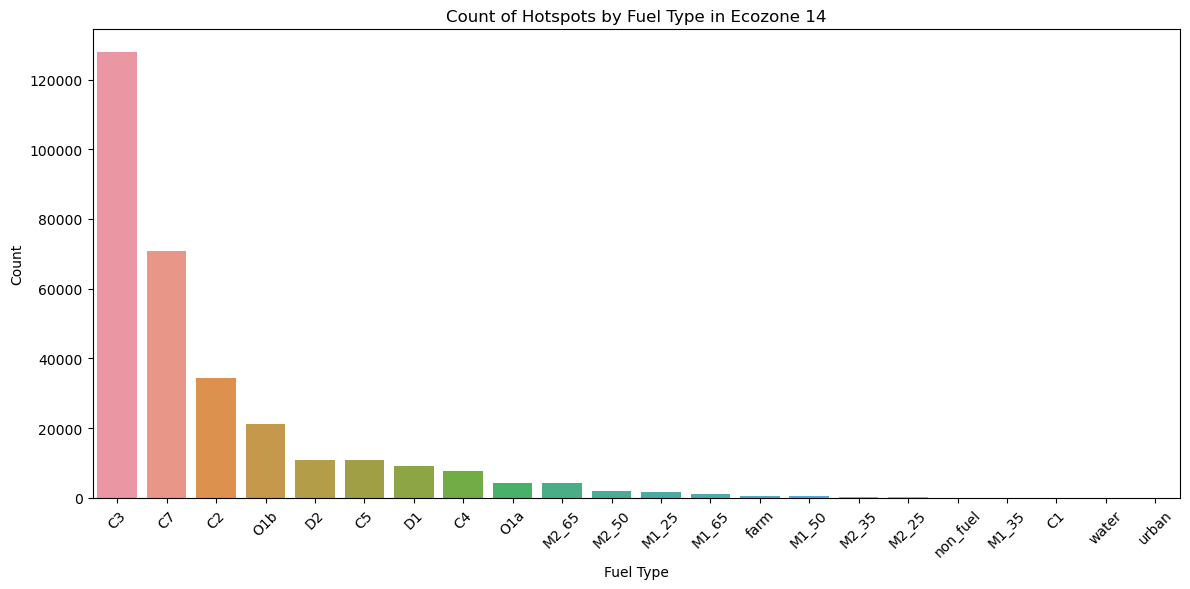

In [ ]:
# Filter data for ecozone 4 and ecozone 14
ecozone_4 = hotspots[hotspots['ecozone'] == 4]
ecozone_14 = hotspots[hotspots['ecozone'] == 14]

# Check the distribution of fuel types in ecozone 4
plt.figure(figsize=(12, 6))
sns.countplot(x='fuel', data=ecozone_4, order=ecozone_4['fuel'].value_counts().index)
plt.title('Count of Hotspots by Fuel Type in Ecozone 4')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Check the distribution of fuel types in ecozone 14
plt.figure(figsize=(12, 6))
sns.countplot(x='fuel', data=ecozone_14, order=ecozone_14['fuel'].value_counts().index)
plt.title('Count of Hotspots by Fuel Type in Ecozone 14')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
selected_features = ['temp', 'relative_humidity', 'wind_speed', 'wind_direction', 'precip','fine_fuel_moisture_code', 'duff_moisture_code', 'drought_code','initial_spread_index', 'buildup_index', 'fire_weather_index','rate_of_spread', 'surface_fuel_consumption','total_fuel_consumption', 'crown_fraction_burned', 'elevation', 'surface_fuel_load',
       'crown_fuel_load', 'fuel_type','total_fuel_consumption(tfc0)','ecozone', 'surface_fuel_consumption(sfc0)','doy']

In [ ]:
hotspot_ts = hotspots.copy()

# Convert 'rep_date' to datetime and set as index in the copied DataFrame
hotspot_ts['rep_date'] = pd.to_datetime(hotspot_ts['rep_date'], format='%Y-%m-%d %H:%M:%S')
hotspot_ts.set_index('rep_date', inplace=True)

# Ensure 'hotspot_ts' is sorted by date
hotspot_ts = hotspot_ts.sort_index()


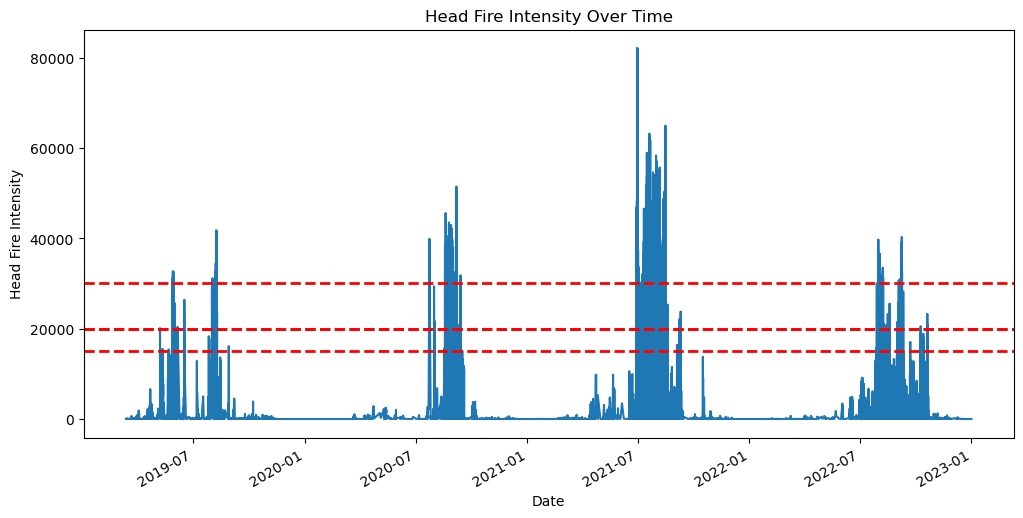

In [ ]:
# Plotting the head fire intensity over time
plt.figure(figsize=(12, 6))
hotspot_ts['hfi'].plot()
plt.axhline(y=20000, color='red', linestyle='--', linewidth=2)  
plt.axhline(y=15000, color='red', linestyle='--', linewidth=2) 
plt.axhline(y=20000, color='red', linestyle='--', linewidth=2)  
plt.axhline(y=30000, color='red', linestyle='--', linewidth=2)
plt.title('Head Fire Intensity Over Time')
plt.xlabel('Date')
plt.ylabel('Head Fire Intensity')
plt.show()


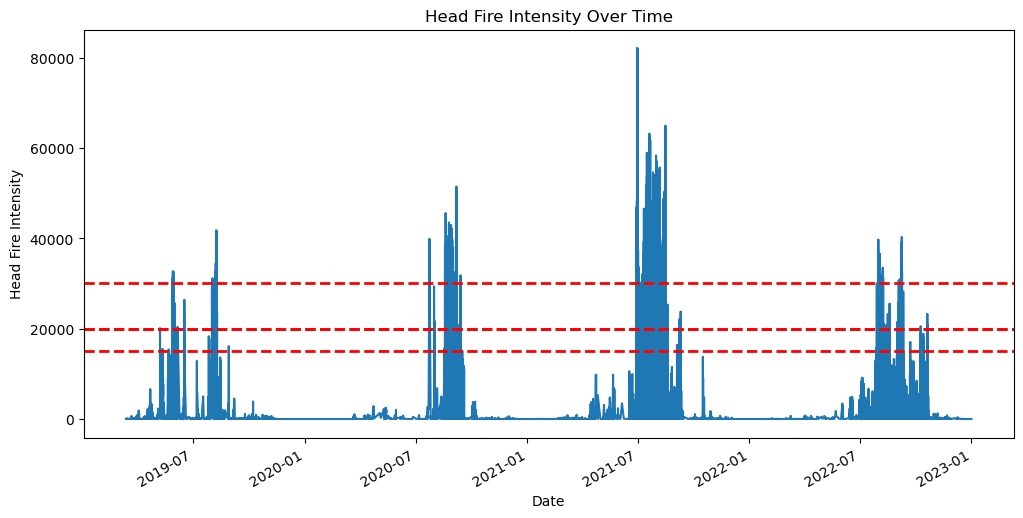

In [ ]:
# Plotting the head fire intensity over time
plt.figure(figsize=(12, 6))
hotspot_ts['hfi'].plot()
plt.axhline(y=20000, color='red', linestyle='--', linewidth=2)  
plt.axhline(y=15000, color='red', linestyle='--', linewidth=2) 
plt.axhline(y=20000, color='red', linestyle='--', linewidth=2)  
plt.axhline(y=30000, color='red', linestyle='--', linewidth=2)
plt.title('Head Fire Intensity Over Time')
plt.xlabel('Date')
plt.ylabel('Head Fire Intensity')
plt.show()


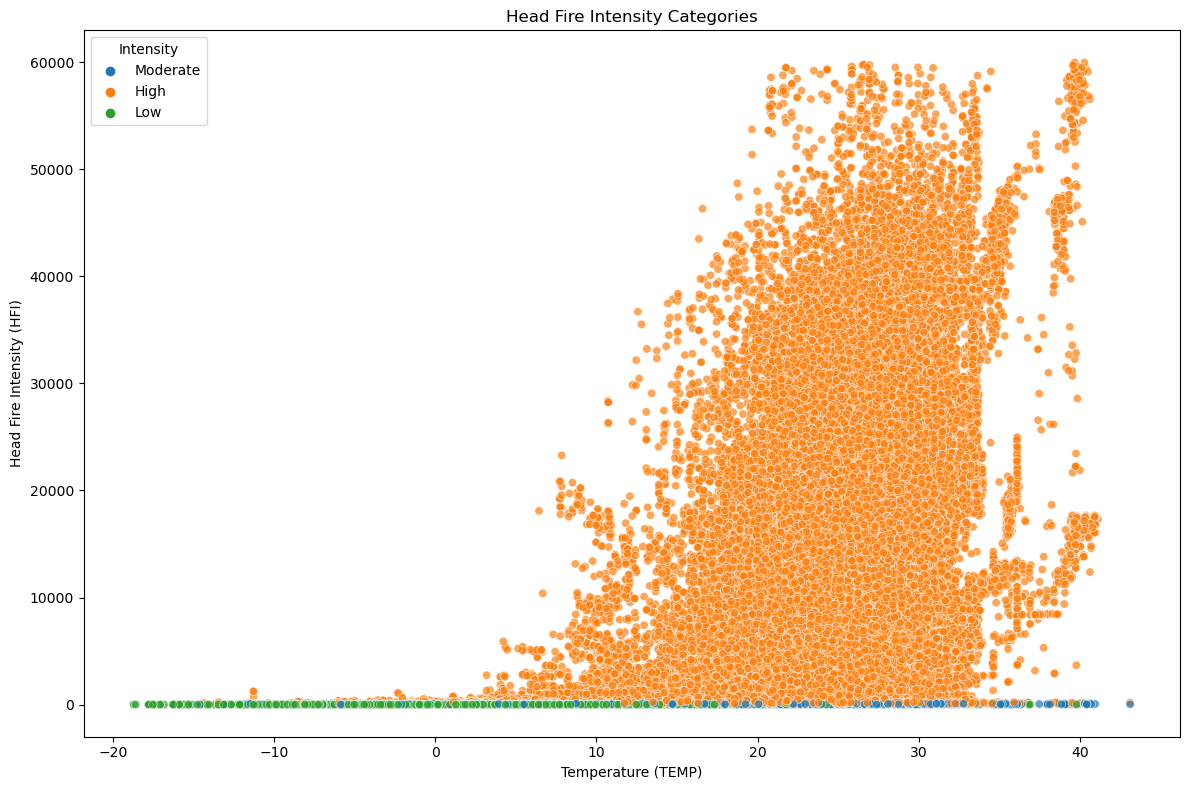

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sampled_df, x='temp', y='hfi', hue='Intensity', palette=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.7)
plt.title('Head Fire Intensity Categories')
plt.xlabel('Temperature (TEMP)')
plt.ylabel('Head Fire Intensity (HFI)')
plt.legend(title='Intensity')
plt.tight_layout()
plt.show()


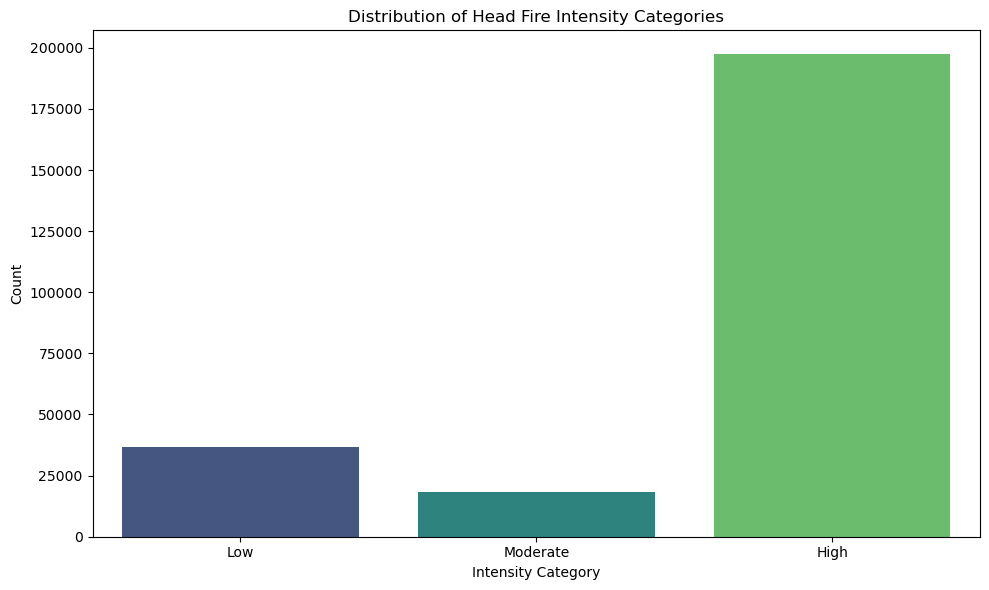

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Intensity', data=sampled_df, palette='viridis', order=['Low', 'Moderate', 'High'])
plt.title('Distribution of Head Fire Intensity Categories')
plt.xlabel('Intensity Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


## Part 2

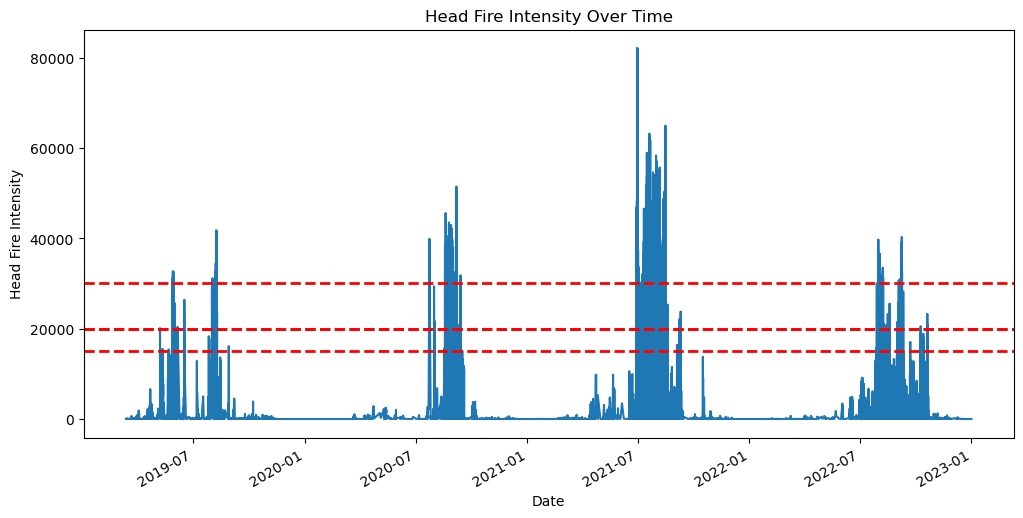

In [ ]:
# Plotting the head fire intensity over time
plt.figure(figsize=(12, 6))
hotspot_ts['hfi'].plot()
plt.axhline(y=20000, color='red', linestyle='--', linewidth=2)  
plt.axhline(y=15000, color='red', linestyle='--', linewidth=2) 
plt.axhline(y=20000, color='red', linestyle='--', linewidth=2)  
plt.axhline(y=30000, color='red', linestyle='--', linewidth=2)
plt.title('Head Fire Intensity Over Time')
plt.xlabel('Date')
plt.ylabel('Head Fire Intensity')
plt.show()


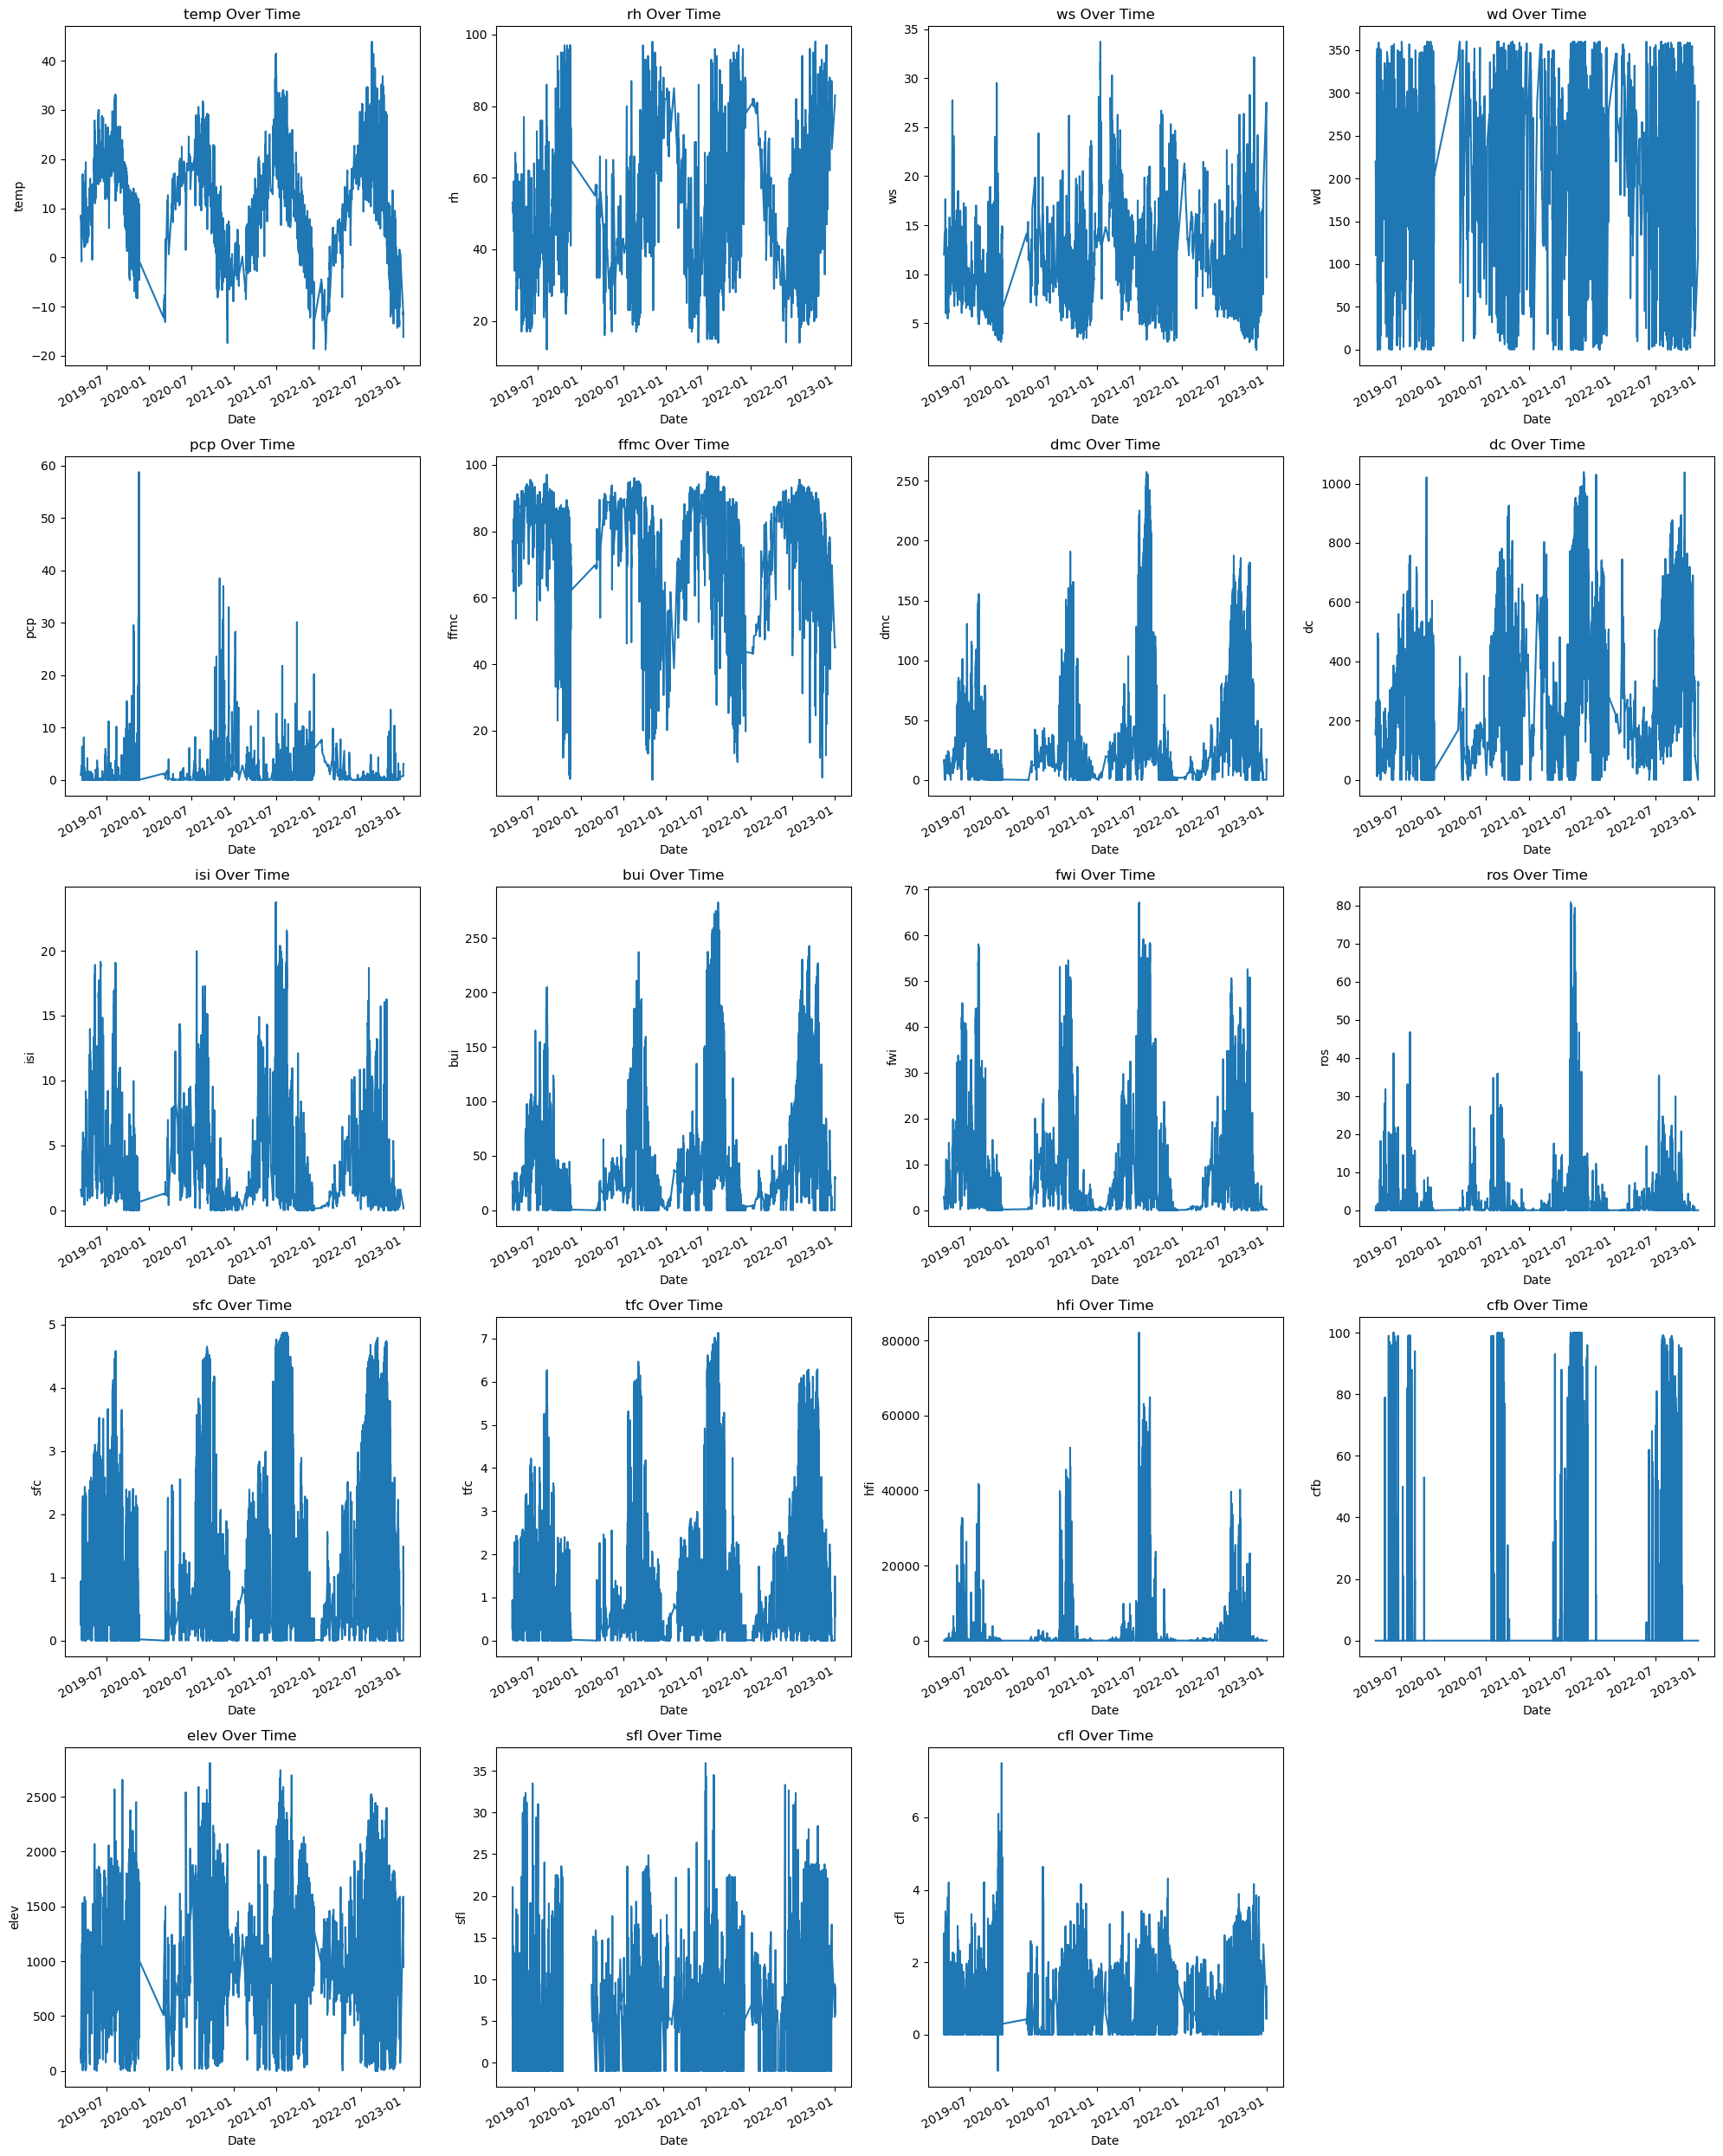

In [ ]:
# Define the list of continuous numerical variables
continuous_variables = ['temp', 'rh', 'ws', 'wd', 'pcp', 'ffmc', 'dmc', 'dc', 'isi', 'bui', 'fwi', 'ros', 'sfc', 'tfc', 'hfi', 'cfb', 'elev', 'sfl', 'cfl']

# Determine the number of rows and columns
n_cols = 4
n_rows = (len(continuous_variables) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

# Plot each continuous numerical variable
for i, var in enumerate(continuous_variables):
    hotspot_ts[var].plot(ax=axes[i])
    axes[i].set_title(f'{var} Over Time')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(var)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
hotspot_filtered2= hotspots[hotspots['hfi'] <= 60000]

In [ ]:
# Ensure 'Intensity' column exists
if 'Intensity' not in hotspot_filtered2.columns:
    # Create the 'Intensity' column if it does not exist
    def categorize_intensity(hfi):
        if hfi <= 10:
            return 'Low'
        elif hfi <= 100:
            return 'Moderate'
        else:
            return 'High'

    hotspot_filtered2['Intensity'] = hotspot_filtered2['hfi'].apply(categorize_intensity)

# Convert 'Intensity' to category
hotspot_filtered2['Intensity'] = hotspot_filtered2['Intensity'].astype('category')

# Sample 50 cases from each class
sampled_data = hotspot_filtered2.groupby('Intensity').apply(lambda x: x.sample(n=50, random_state=1)).reset_index(drop=True)

# Verify the number of samples per class
print(sampled_data['Intensity'].value_counts())

# Display the first few rows of the new dataset
sampled_data.head()


Intensity
High        50
Low         50
Moderate    50
Name: count, dtype: int64


,lat,lon,rep_date,source,sensor,satellite,agency,temp,rh,ws,...,sfl,cfl,tfc0,ecozone,sfc0,cbh,uid,fid,year,Intensity
0,54.430000,-122.723999,2021-11-01 21:16:00,USFS,VIIRS-I,S-NPP,BC,1.556000,63,9.218,...,10.171617,1.727469,1.34,14.0,1.34,11.712985,NaN,NaN,2021.0,High
1,51.077000,-120.567001,2021-08-15 09:58:00,USFS,VIIRS-I,NOAA-20,BC,22.822001,33,11.182,...,6.006945,1.889667,4.52,14.0,4.52,15.147715,NaN,NaN,2021.0,High
2,49.139999,-119.502998,2021-07-21 21:42:00,USFS,VIIRS-I,S-NPP,BC,25.010000,25,11.253,...,-1.000000,0.097653,0.35,14.0,0.35,-1.000000,NaN,NaN,2021.0,High
3,53.577000,-124.695999,2021-07-09 10:42:00,USFS,VIIRS-I,S-NPP,BC,26.645000,35,7.518,...,5.047904,0.637695,2.58,14.0,2.58,9.862782,NaN,NaN,2021.0,High
4,57.895800,-131.993000,2019-08-09 20:54:00,NASA,IBAND,S-NPP,BC,15.375000,37,7.348,...,5.751010,1.258000,2.27,12.0,2.13,6.621620,NaN,NaN,2019.0,High
